tutorial on strategy to make doubled bets on a game, such as roulette.  This will be a multi part tutorial,

- Part 1: model the roulette wheel, and do a bit of data science to see the output of the modeled roulette wheel
- Part 2: model a gambling table, with min and max bets
- Part 3: model the bet structure
- Part 4: dig into the data

In [1]:
import random

class RouletteWheel:
    """The RouletteWheel class creates a model of a fair roulette wheel.  The default constructor is a wheel with a '0' and a '00'"""
    win_payout = 2 # this is the payout for red/black
    lose_payout = 0 
    
    def __init__(self):
        """The default constructor, with '00' and '0'"""
        self.wheel = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,'0','00']
        self.int_position = 0 # starting point for a fresh wheel
        
    def spin_wheel(self):
        self.int_position = random.randint(0,37)
        return self.int_position
    
    def get_spin_result(self):
        return str(self.wheel[self.int_position])
    
    def get_color(self):
        color = ""
        if self.int_position == 37:
            color = "Green"
            return color
        if self.int_position == 36:
            color = "Green"
            return color
        if self.int_position % 2 == 1:
            # this is when you have an odd number
            color = "Black"
            return color
        if self.int_position % 2 == 0:
            # this is where you have an even number
            color = "Red"
            return color
        
this_is_a_fair_roulette_wheel = RouletteWheel()

bunch_of_spins = []
for i in range(50):
    this_is_a_fair_roulette_wheel.spin_wheel()
    bunch_of_spins.append(this_is_a_fair_roulette_wheel.get_color())
    

print(bunch_of_spins)
    

['Red', 'Black', 'Black', 'Black', 'Black', 'Red', 'Black', 'Black', 'Red', 'Black', 'Red', 'Green', 'Black', 'Black', 'Black', 'Red', 'Red', 'Black', 'Black', 'Black', 'Black', 'Red', 'Black', 'Red', 'Black', 'Red', 'Red', 'Black', 'Red', 'Red', 'Red', 'Red', 'Black', 'Red', 'Red', 'Black', 'Red', 'Black', 'Black', 'Red', 'Red', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Red', 'Red', 'Red']


Let's add some data sciency stuff into this model...  I want to show a histogram

(array([2.0167e+04, 3.0800e+03, 2.2100e+03, 3.4700e+02, 1.4600e+02,
        1.2300e+02, 2.3000e+01, 1.0000e+01, 1.0000e+00, 4.0000e+00]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

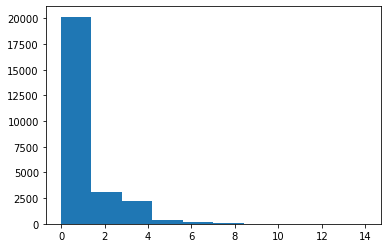

In [2]:
import numpy as np
import matplotlib.pyplot as plt

another_roulette_wheel = RouletteWheel()
really_lots_of_spins = []

for i in range(50000):
    another_roulette_wheel.spin_wheel()
    really_lots_of_spins.append(another_roulette_wheel.get_color())
    
#really_lots_of_spins
    
def count_consecutive_spins(spins_list):
    number_in_a_row = []
    tempCount = 0
    for i in spins_list:
        if i != "Black":
            number_in_a_row.append(tempCount)
            tempCount = 0
        else:
            tempCount = tempCount + 1
    return number_in_a_row

black_results = count_consecutive_spins(really_lots_of_spins)

plt.hist(black_results)

Let's create a "table" that holds the roulette wheel.  The key attributes that we will need to model for this table are the min and max bets...... for our strategy this is important.  

In [3]:
class TableGame:
    """The TableGame class sets the min and max bets and accepts the bets.  Default constructor is roulette."""
    def __init__(self, min_bet, max_bet):
        """the default constructor - roulette wheel"""
        self.table = RouletteWheel()
        if min_bet <= max_bet:
            self.min_bet = min_bet
            self.max_bet = max_bet
            self.bet = 0
        else:
            print("Min bet must be less than max bet.")
    
    def place_bet(self, amount_bet):
        if amount_bet < self.min_bet:
            print("Bet not accepted")
            return 0
        if amount_bet > self.max_bet:
            print("Bet not accepted")
            return 0
        print("Bet accepted")
        self.bet = amount_bet
        return self.bet
 
not_really_valid_table = TableGame(50000, 3)

valid_table = TableGame(5, 1000)

valid_table.place_bet(3)
valid_table.place_bet(1001)

valid_table.place_bet(200)

Min bet must be less than max bet.
Bet not accepted
Bet not accepted
Bet accepted


200